# 📊 Data Analysis, Data Preprocessing, Feature Engineering on Video Game Sales Dataset

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🧩 Load the Dataset

In [3]:
# load and read dataset
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 🗂️ Dataset Description
- **Rank** – Ranking of the game based on global sales
- **Name** – Name of the video game
- **Platform** – Platform the game was released on (e.g., PS4, X360)
- **Year** – Release year of the game
- **Genre** – Type of game (e.g., Action, Sports)
- **Publisher** – Company that published the game
- **NA_Sales** – Sales in North America (in millions)
- **EU_Sales** – Sales in Europe (in millions)
- **JP_Sales** – Sales in Japan (in millions)
- **Other_Sales** – Sales in other regions (in millions)
- **Global_Sales** – Total worldwide sales (in millions)

## ⚙️ Basic Data Exploration

In [4]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Summary statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# Shape of dataset
df.shape

(16598, 11)

## 📈 Data Visualization — Comparing Features with Target Variable

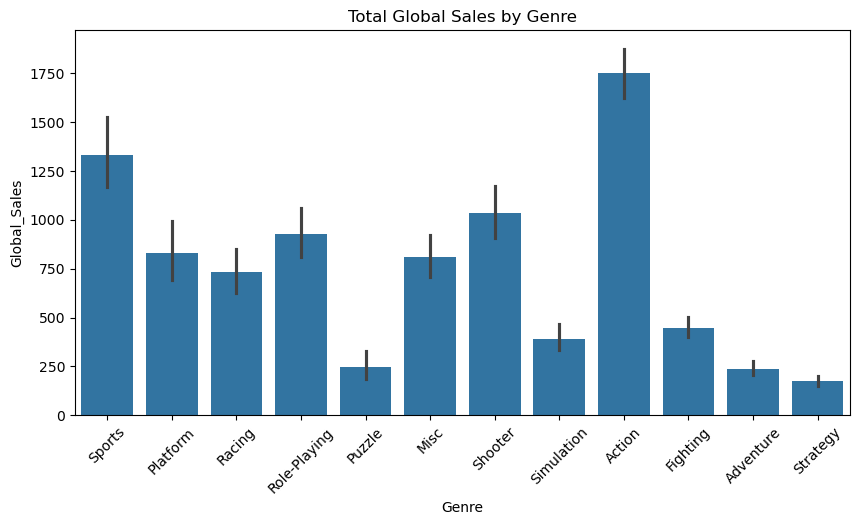

In [7]:
#data visualization of total sales by genre by barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Global_Sales', data=df, estimator=sum)
plt.title('Total Global Sales by Genre')
plt.xticks(rotation=45)
plt.show()

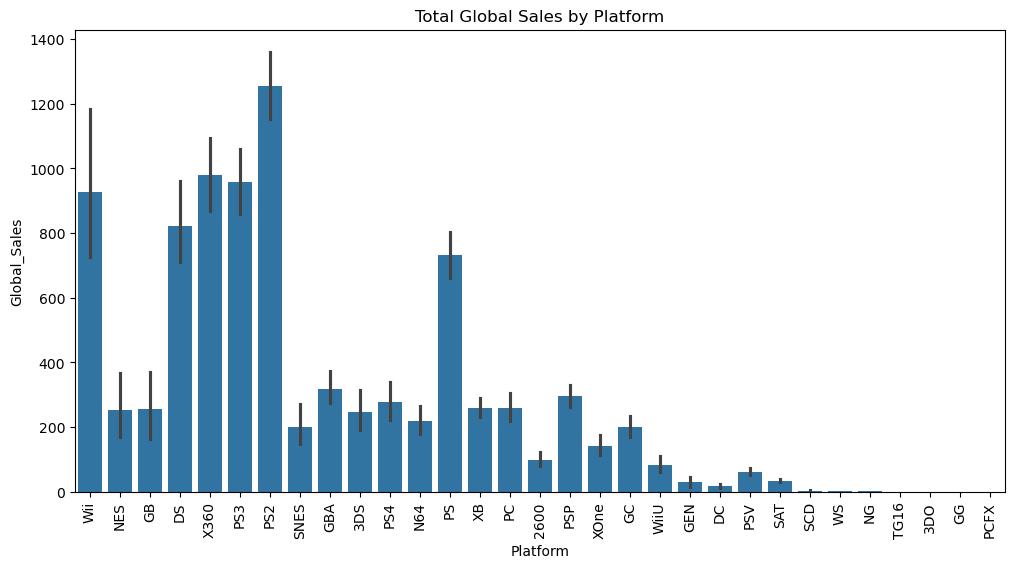

In [8]:
#data visualization of total sales by platform by barplot
plt.figure(figsize=(12,6))
sns.barplot(x='Platform', y='Global_Sales', data=df, estimator=sum)
plt.title('Total Global Sales by Platform')
plt.xticks(rotation=90)
plt.show()

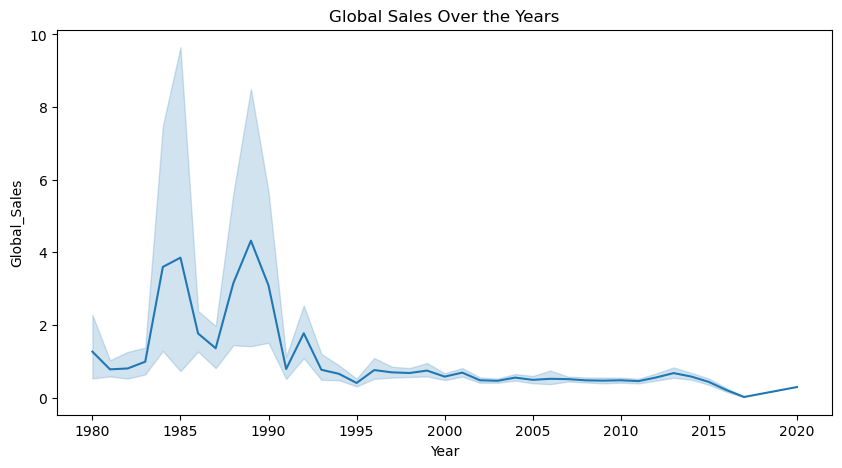

In [9]:
# graph of total sales over the years
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Global_Sales', data=df)
plt.title('Global Sales Over the Years')
plt.show()

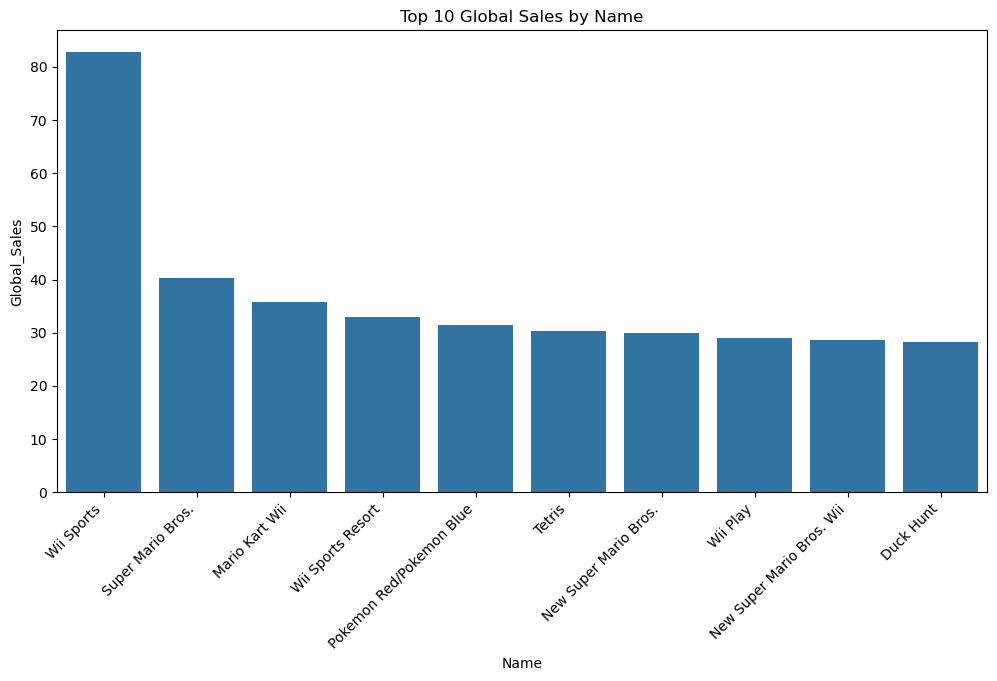

In [10]:
#data visualization of top 10 global sales by name by barplot
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Global_Sales', data=df.sort_values('Global_Sales', ascending=False).head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Global Sales by Name')
plt.show()


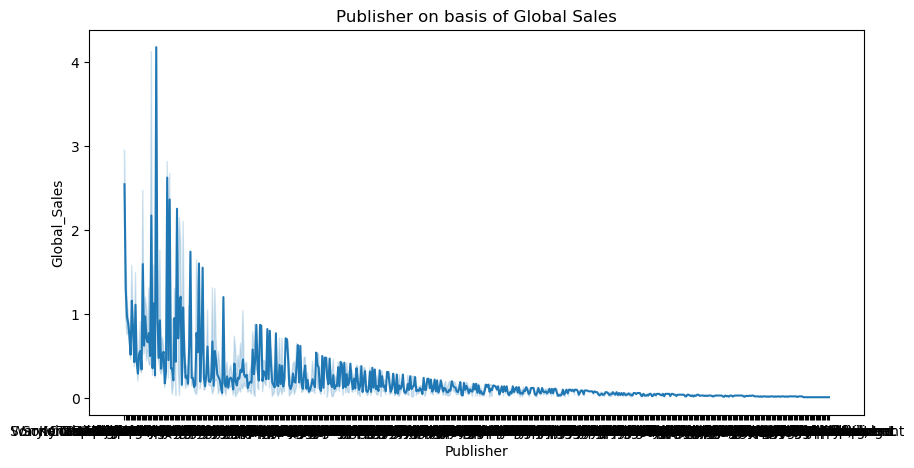

In [11]:
#Graph of publisher on basis of global sales
plt.figure(figsize=(10,5))
sns.lineplot(x='Publisher', y='Global_Sales', data=df)
plt.title('Publisher on basis of Global Sales')
plt.show()

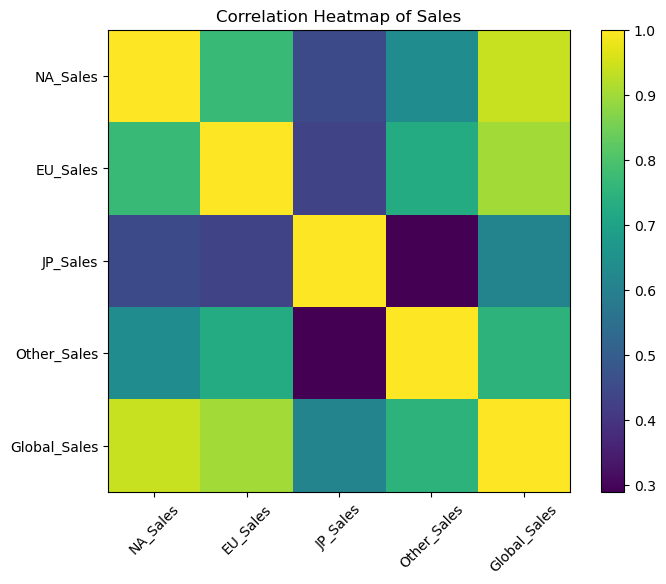

In [12]:
#coorelation heatmap of sales
plt.figure(figsize=(8,6))
corr = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()
plt.imshow(corr, cmap='viridis')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Heatmap of Sales')
plt.show()
plt.close()

In [13]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


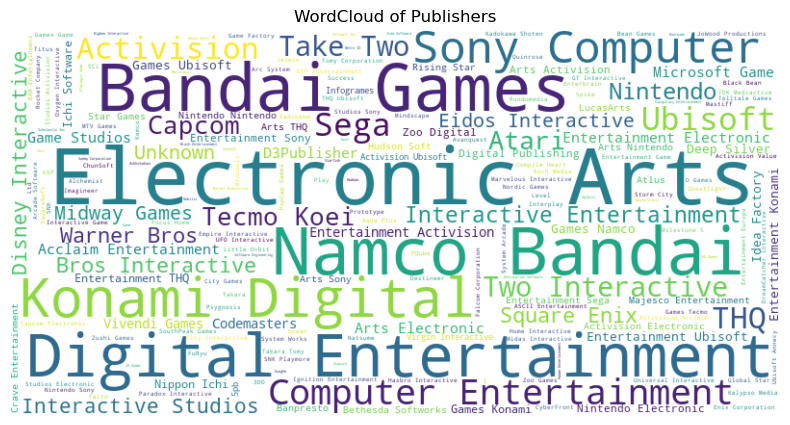

In [14]:
#using wordcloud for publishers
from wordcloud import WordCloud

text = ' '.join(df['Publisher'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Publishers")
plt.show()


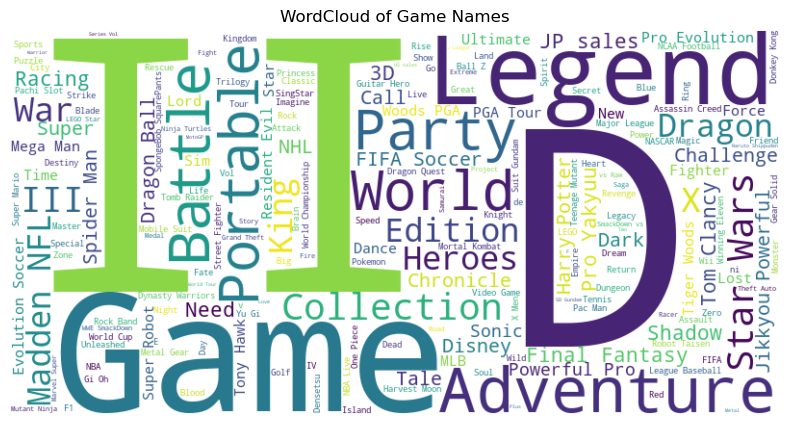

In [15]:
# wordcloud of name of games
from wordcloud import WordCloud

text = ' '.join(df['Name'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Game Names")
plt.show()


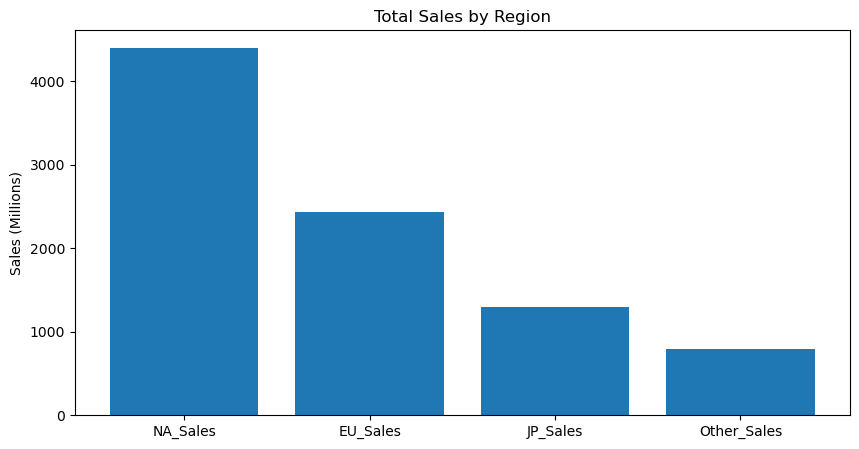

In [16]:
#barplot of total sales by region
plt.figure(figsize=(10,5))
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_totals = df[regions].sum()
plt.bar(region_totals.index, region_totals.values)
plt.title('Total Sales by Region')
plt.ylabel('Sales (Millions)')
plt.show()
plt.close()

## 🧠 Observations
- **Action** and **Sports** genres have the highest total global sales.
- **PS2** and **X360** are among the top-performing platforms.
- Sales peaked around **2008–2009** and then declined over time.

## Data Preprocessing

In [17]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [18]:
#load and read dataset
df = pd.read_csv("vgsales.csv")
df.head(16599)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## check for null values
### Remove na values 

In [19]:
#check for null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [20]:
#filling na values of year with median
df["Year"].fillna(df["Year"].median())

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [21]:
#removing nan rows from year
df.dropna(subset=["Year"], inplace=True)

In [22]:
#flling na values of publisher with mode
df["Publisher"].fillna(df["Publisher"].mode()[0])

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16327, dtype: object

In [23]:
df["Publisher"].fillna("unknown")

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16327, dtype: object

In [24]:
#now again checking for null values
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

## Global Sales Outliers

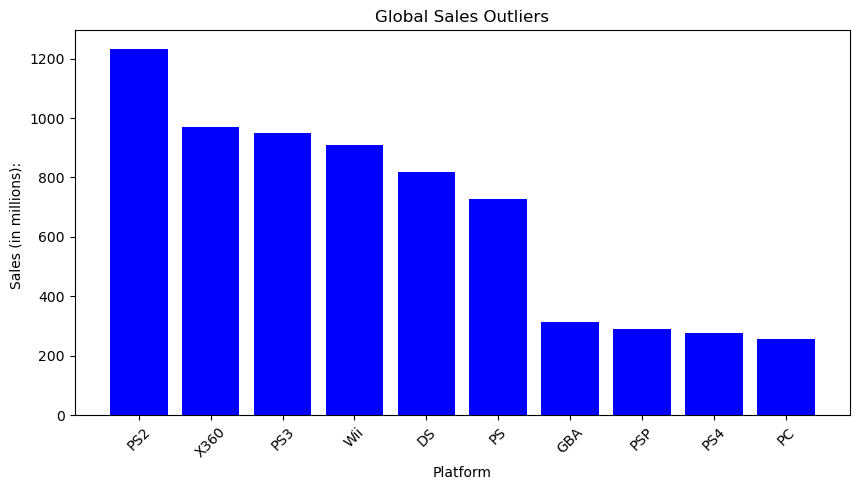

In [25]:
#bargraph showing global sales outliers
sales_by_platform = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(sales_by_platform.index, sales_by_platform.values, color="Blue")
plt.title("Global Sales Outliers")
plt.xlabel("Platform")
plt.ylabel("Sales (in millions): ")
plt.xticks(rotation=45)
plt.show()

In [26]:
#summarize and include all columns
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327,16327,16327.000000,16327,16291,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
unique,NaN,11360,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2133,NaN,3253,1339,NaN,NaN,NaN,NaN,NaN
mean,8292.868194,NaN,NaN,2006.406443,NaN,NaN,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,NaN,NaN,5.828981,NaN,NaN,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


## Histograms of dataset with boxplot indicating the outliers

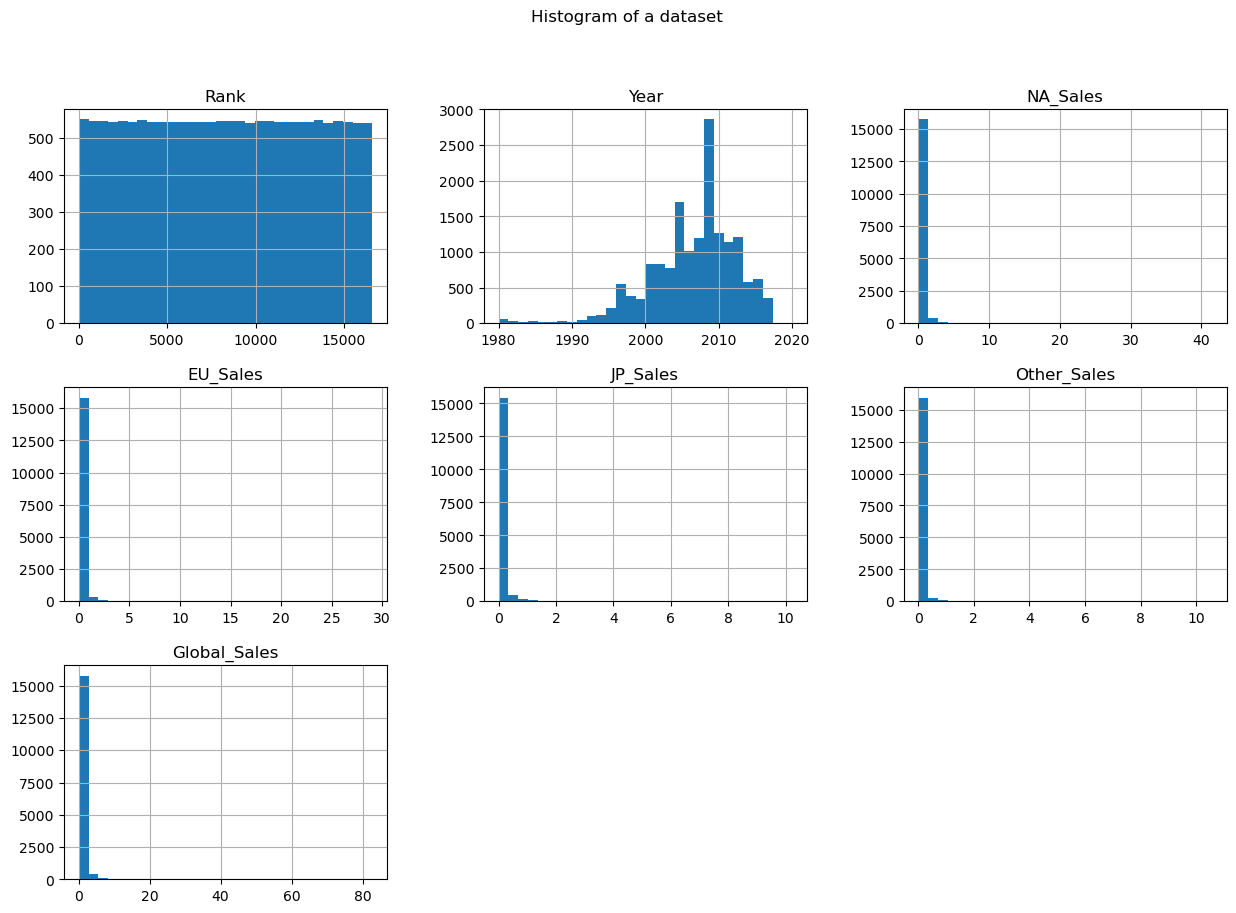

In [27]:
#histograms of all dataset
df.hist(bins = 30, figsize=(15,10))
plt.suptitle("Histogram of a dataset")
plt.show()

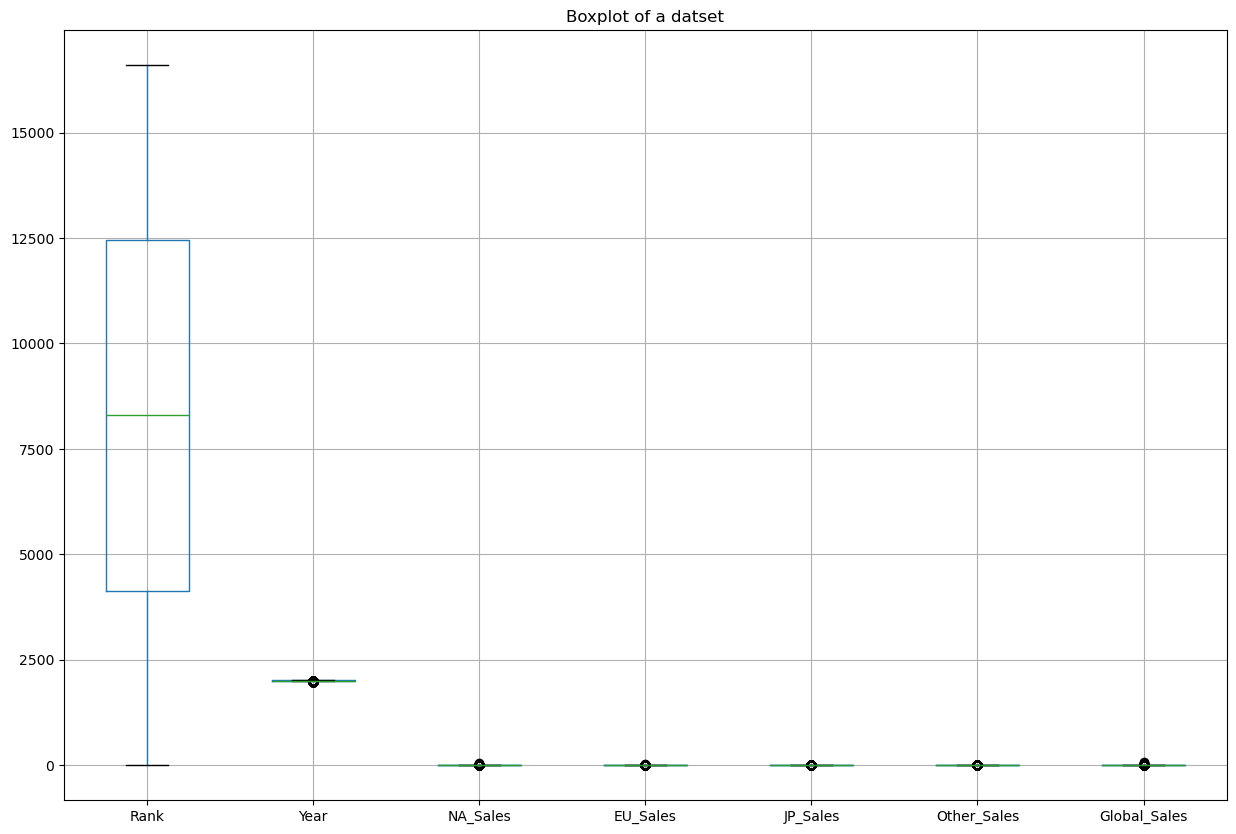

In [28]:
#boxplot of dataset showing outliers
df.boxplot(figsize=(15,10))
plt.title("Boxplot of a datset")
plt.show()

In [29]:
#checking for null values
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

## Fix missing data

In [30]:
cat_cols = ['Name', 'Platform', 'Genre', 'Publisher']

for col in cat_cols:
    df[col].fillna("Unknown")


In [31]:
#iterate through each categorial columns and fills/replace any missing values(nan) with unknown
num_cols = ['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for col in num_cols:
    df[col].fillna(df[col].median())

In [32]:
#show head
df.head(16599)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [33]:
#checking for null values
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327,16327,16327.000000,16327,16291,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
unique,NaN,11360,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2133,NaN,3253,1339,NaN,NaN,NaN,NaN,NaN
mean,8292.868194,NaN,NaN,2006.406443,NaN,NaN,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,NaN,NaN,5.828981,NaN,NaN,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


## Fixing outliers

In [34]:
#calculating iqr of the numeric values
numeric_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Year']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\nColumn: {col}")
    print(f"Outliers count: {len(outliers)}")



Column: NA_Sales
Outliers count: 1660

Column: EU_Sales
Outliers count: 2054

Column: JP_Sales
Outliers count: 2407

Column: Other_Sales
Outliers count: 1645

Column: Global_Sales
Outliers count: 1827

Column: Year
Outliers count: 305


In [35]:
#fixing outliers of the described numerical columns
for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Year']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)

In [36]:
#show head
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,0.6,0.275,0.1,0.1,1.11
1,2,Super Mario Bros.,NES,1992.5,Platform,Nintendo,0.6,0.275,0.1,0.1,1.11
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.6,0.275,0.1,0.1,1.11
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.6,0.275,0.1,0.1,1.11
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.6,0.275,0.1,0.1,1.11


In [37]:
#now again calculating iqr of the numeric values
numeric_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Year']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\nColumn: {col}")
    print(f"Outliers count: {len(outliers)}")


Column: NA_Sales
Outliers count: 0

Column: EU_Sales
Outliers count: 0

Column: JP_Sales
Outliers count: 0

Column: Other_Sales
Outliers count: 0

Column: Global_Sales
Outliers count: 0

Column: Year
Outliers count: 0


## Fixing catergorial inconsistencies

In [38]:
#showing unique categories to check categorial inconsistencies
print(df['Platform'].unique())
print(df['Genre'].unique())
print(df['Publisher'].unique()[:50])


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Ente

In [39]:
#normalization of categories to lowercase so all becomes same
df['Publisher_lower'] = df['Publisher'].str.lower()
df['Platform_lower'] = df['Platform'].str.lower()
df['Genre_lower'] = df['Genre'].str.lower()

#.nunique() counts the number of distinct values in each column.
print("Publisher unique after lower():", df['Publisher_lower'].nunique())
print("Platform unique after lower():", df['Platform_lower'].nunique())
print("Genre unique after lower():", df['Genre_lower'].nunique())


Publisher unique after lower(): 576
Platform unique after lower(): 31
Genre unique after lower(): 12


In [40]:
#data cleaning loop
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower().str.replace("-", " ").str.replace("_"," ")

In [41]:
#now again using unique to check categorial inconsistencies, normalization
print(df['Platform'].unique())
print(df['Genre'].unique())
print(df['Publisher'].unique()[:50])


['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' '3ds' 'ps4' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'gc' 'wiiu' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']
['sports' 'platform' 'racing' 'role playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']
['nintendo' 'microsoft game studios' 'take two interactive'
 'sony computer entertainment' 'activision' 'ubisoft' 'bethesda softworks'
 'electronic arts' 'sega' 'squaresoft' 'atari' '505 games' 'capcom'
 'gt interactive' 'konami digital entertainment'
 'sony computer entertainment europe' 'square enix' 'lucasarts'
 'virgin interactive' 'warner bros. interactive entertainment'
 'universal interactive' 'eidos interactive' 'redoctane' 'vivendi games'
 'enix corporation' 'namco bandai games' 'palcom' 'hasbro interactive'
 'thq' 'fox interactive' 'acclaim entertainment' 'mtv games'
 'disney interactive studios' 'majesco entertainment' 'codemasters'
 'red orb' 'level 5' 'arena ente

## Fixing mismatch, invalid entries

In [42]:
#extracting/fixing all games(or rows) with no sales
zero_sales = df[
    (df['NA_Sales'] == 0) &
    (df['EU_Sales'] == 0) &
    (df['JP_Sales'] == 0) &
    (df['Other_Sales'] == 0) &
    (df['Global_Sales'] == 0)
]
zero_sales


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,Platform_lower,Genre_lower


In [43]:
# Validating Global Sales Consistency
df['Calculated_Global'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

mismatch = df[df['Calculated_Global'].round(2) != df['Global_Sales'].round(2)]
mismatch
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,Platform_lower,Genre_lower,Calculated_Global
0,1,wii sports,wii,2006.0,sports,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,sports,1.075
1,2,super mario bros.,nes,1992.5,platform,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,nes,platform,1.075
2,3,mario kart wii,wii,2008.0,racing,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,racing,1.075
3,4,wii sports resort,wii,2009.0,sports,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,sports,1.075
4,5,pokemon red/pokemon blue,gb,1996.0,role playing,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,gb,role-playing,1.075


## Fixing Duplicates

In [44]:
# Detecting and fixing Duplicate Rows in a DataFrame
df.duplicated().sum()
df[df.duplicated()]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,Platform_lower,Genre_lower,Calculated_Global


In [45]:
# Handling fixing & dropping Duplicate Rows in a DataFrame
duplicate_names = df[df['Name'].duplicated()]
duplicate_names
df.drop_duplicates(inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,Platform_lower,Genre_lower,Calculated_Global
0,1,wii sports,wii,2006.0,sports,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,sports,1.075
1,2,super mario bros.,nes,1992.5,platform,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,nes,platform,1.075
2,3,mario kart wii,wii,2008.0,racing,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,racing,1.075
3,4,wii sports resort,wii,2009.0,sports,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,wii,sports,1.075
4,5,pokemon red/pokemon blue,gb,1996.0,role playing,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,gb,role-playing,1.075


## Checking histograms of dataset with boxplots incdicating outliers fixed above 

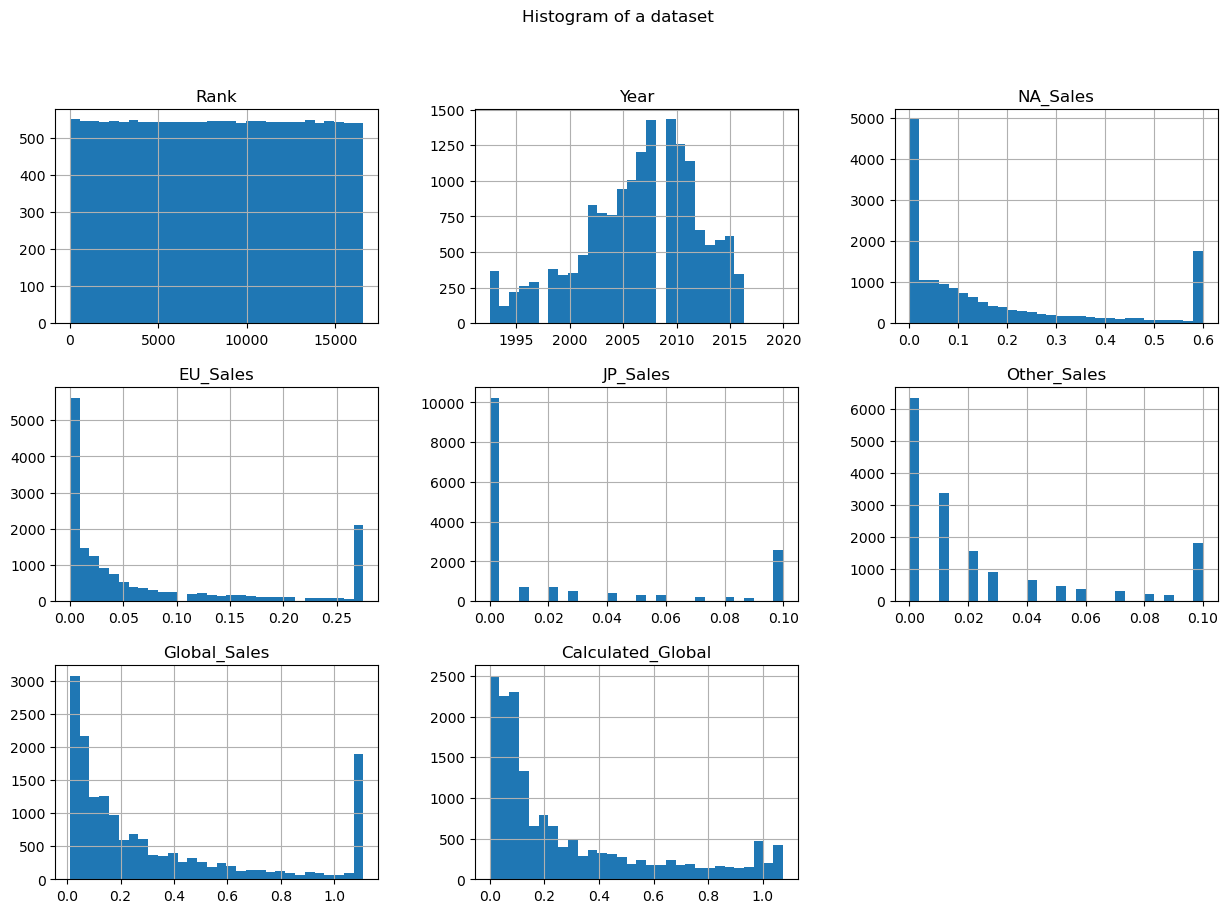

In [46]:
# checking fixed outliers using historgams
df.hist(bins = 30, figsize=(15,10))
plt.suptitle("Histogram of a dataset")
plt.show()

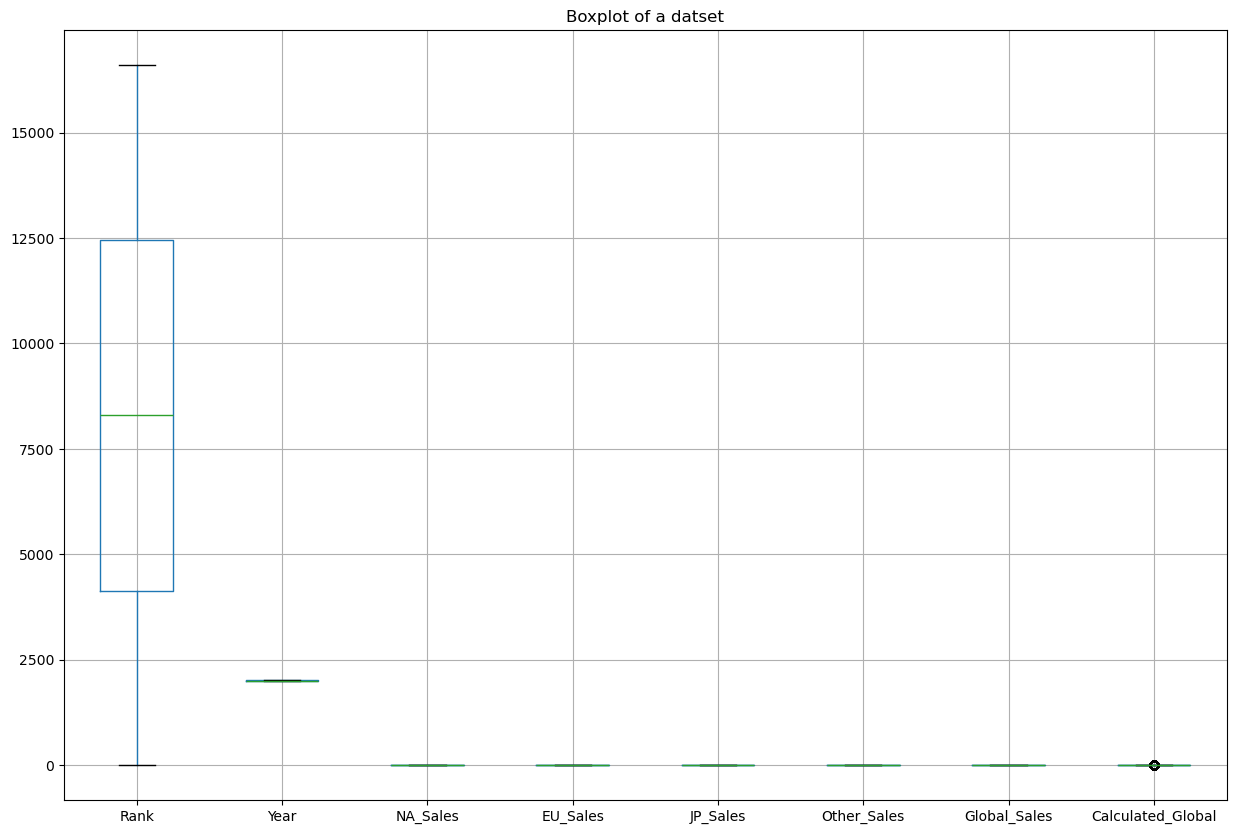

In [47]:
# checking fixed outliers using boxplot
df.boxplot(figsize=(15,10))
plt.title("Boxplot of a datset")
plt.show()

In [48]:
# calculating iqr of 'calculated_global'
for col in ['Calculated_Global']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)

In [49]:
# fixing outliers of 'calculated_global'
numeric_cols = ['Calculated_Global']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\nColumn: {col}")
    print(f"Outliers count: {len(outliers)}")


Column: Calculated_Global
Outliers count: 0


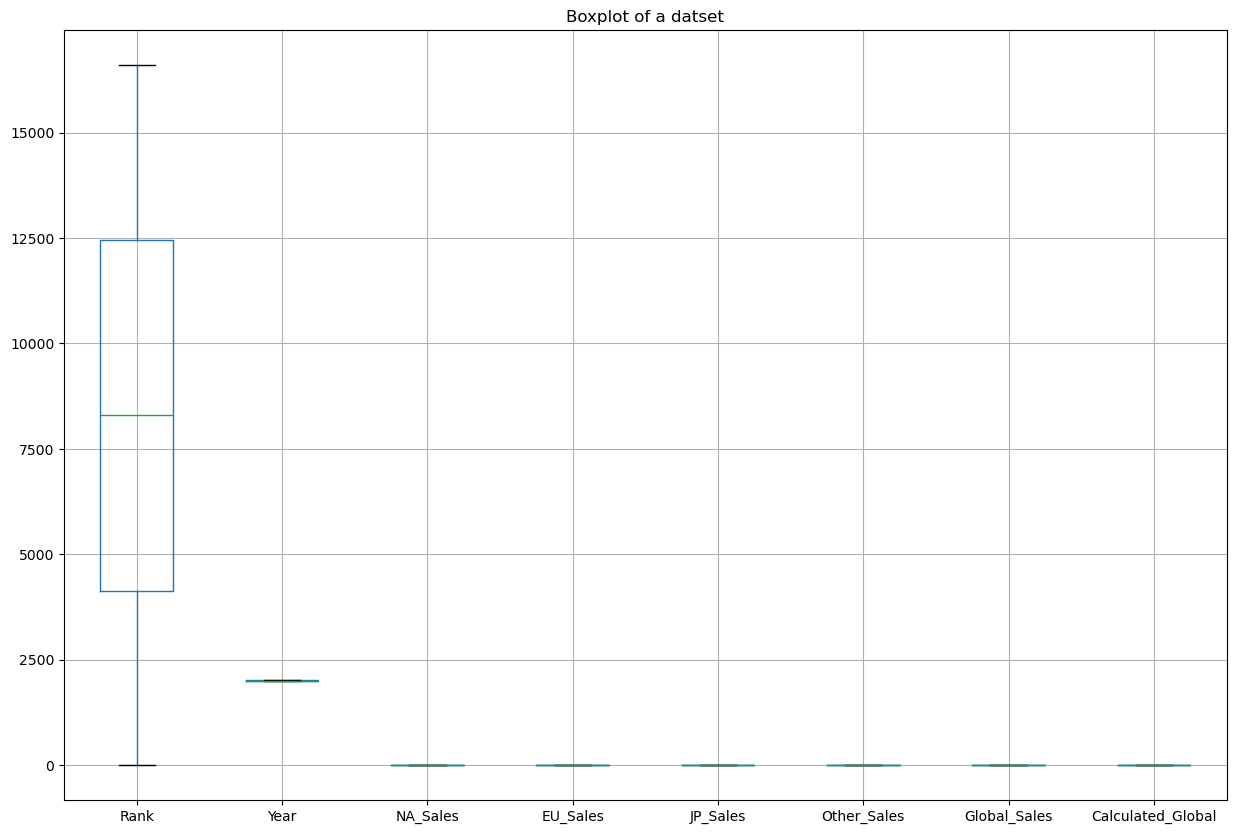

In [50]:
# now again check using boxplot
df.boxplot(figsize=(15,10))
plt.title("Boxplot of a datset")
plt.show()

### 🔍 Insights
- North America contributes the highest sales across most genres.
- A few games show extremely high global sales, indicating the presence of outliers.


## Publisher Grouping + Categorical Encoding Feature Engineering

In [51]:
# Grouping Publishers and Encoding Categorical Variables
publisher_counts = df['Publisher'].value_counts()
top10 = publisher_counts.index[:10]
df['Publisher_Grouped'] = df['Publisher'].apply(lambda x: x if x in top10 else 'Other_Publisher')
# one hot encoding of genre and platform
df = pd.get_dummies(df, columns=['Genre','Platform'], drop_first=True)
# calculated frequencies
freq = df['Publisher_Grouped'].value_counts()
df['Publisher_Freq'] = df['Publisher_Grouped'].map(freq)
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_scd,Platform_snes,Platform_tg16,Platform_wii,Platform_wiiu,Platform_ws,Platform_x360,Platform_xb,Platform_xone,Publisher_Freq
0,1,wii sports,2006.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,True,False,False,False,False,False,696
1,2,super mario bros.,1992.5,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,False,False,696
2,3,mario kart wii,2008.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,True,False,False,False,False,False,696
3,4,wii sports resort,2009.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,True,False,False,False,False,False,696
4,5,pokemon red/pokemon blue,1996.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,False,False,696


## Decade 

In [52]:
# creating new column decade from year
df['Decade'] = (df['Year']//10)*10
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_snes,Platform_tg16,Platform_wii,Platform_wiiu,Platform_ws,Platform_x360,Platform_xb,Platform_xone,Publisher_Freq,Decade
0,1,wii sports,2006.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,True,False,False,False,False,False,696,2000.0
1,2,super mario bros.,1992.5,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,False,696,1990.0
2,3,mario kart wii,2008.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,True,False,False,False,False,False,696,2000.0
3,4,wii sports resort,2009.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,True,False,False,False,False,False,696,2000.0
4,5,pokemon red/pokemon blue,1996.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,False,696,1990.0


## Game Age

In [53]:
# creating new column game age from year
df['Game_Age'] = 2025 - df['Year']
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_tg16,Platform_wii,Platform_wiiu,Platform_ws,Platform_x360,Platform_xb,Platform_xone,Publisher_Freq,Decade,Game_Age
0,1,wii sports,2006.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,True,False,False,False,False,False,696,2000.0,19.0
1,2,super mario bros.,1992.5,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,696,1990.0,32.5
2,3,mario kart wii,2008.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,True,False,False,False,False,False,696,2000.0,17.0
3,4,wii sports resort,2009.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,True,False,False,False,False,False,696,2000.0,16.0
4,5,pokemon red/pokemon blue,1996.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,False,False,False,False,696,1990.0,29.0


## Sales Ratios

In [54]:
# calculating ratios of all sales regions
df['NA_ratio'] = df['NA_Sales'] / df['Global_Sales']
df['EU_ratio'] = df['EU_Sales'] / df['Global_Sales']
df['JP_ratio'] = df['JP_Sales'] / df['Global_Sales']
df['OTHER_ratio'] = df['Other_Sales'] / df['Global_Sales']

In [55]:
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_x360,Platform_xb,Platform_xone,Publisher_Freq,Decade,Game_Age,NA_ratio,EU_ratio,JP_ratio,OTHER_ratio
0,1,wii sports,2006.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,696,2000.0,19.0,0.540541,0.247748,0.09009,0.09009
1,2,super mario bros.,1992.5,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,696,1990.0,32.5,0.540541,0.247748,0.09009,0.09009
2,3,mario kart wii,2008.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,696,2000.0,17.0,0.540541,0.247748,0.09009,0.09009
3,4,wii sports resort,2009.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,696,2000.0,16.0,0.540541,0.247748,0.09009,0.09009
4,5,pokemon red/pokemon blue,1996.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,False,696,1990.0,29.0,0.540541,0.247748,0.09009,0.09009


## Is Game a Hit?

In [56]:
# creating column to check if the game is a succes or not
df['Is_Hit'] = (df['Global_Sales']>1).astype(int)
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_xb,Platform_xone,Publisher_Freq,Decade,Game_Age,NA_ratio,EU_ratio,JP_ratio,OTHER_ratio,Is_Hit
0,1,wii sports,2006.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000.0,19.0,0.540541,0.247748,0.09009,0.09009,1
1,2,super mario bros.,1992.5,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,1990.0,32.5,0.540541,0.247748,0.09009,0.09009,1
2,3,mario kart wii,2008.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000.0,17.0,0.540541,0.247748,0.09009,0.09009,1
3,4,wii sports resort,2009.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000.0,16.0,0.540541,0.247748,0.09009,0.09009,1
4,5,pokemon red/pokemon blue,1996.0,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,1990.0,29.0,0.540541,0.247748,0.09009,0.09009,1


## Year, Decade, Game Age dtype change from float to int64

In [57]:
# changing dtype of year, decade, game age to int64
df['Year'] = df['Year'].round().astype('Int64')
df['Decade'] = df['Decade'].round().astype('Int64')
df['Game_Age'] = df['Game_Age'].round().astype('Int64')
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,Platform_xb,Platform_xone,Publisher_Freq,Decade,Game_Age,NA_ratio,EU_ratio,JP_ratio,OTHER_ratio,Is_Hit
0,1,wii sports,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000,19,0.540541,0.247748,0.09009,0.09009,1
1,2,super mario bros.,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,1990,32,0.540541,0.247748,0.09009,0.09009,1
2,3,mario kart wii,2008,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000,17,0.540541,0.247748,0.09009,0.09009,1
3,4,wii sports resort,2009,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,2000,16,0.540541,0.247748,0.09009,0.09009,1
4,5,pokemon red/pokemon blue,1996,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,False,False,696,1990,29,0.540541,0.247748,0.09009,0.09009,1


## Check null columns

In [58]:
# checking for any null columns
null_columns = df.columns[df.isnull().any()]
print(null_columns)

Index(['Publisher', 'Publisher_lower'], dtype='object')


## Publishers covered

In [59]:
# Flagging Major Publishers and Normalizing Publisher Names
df['Is_Nintendo'] = df['Publisher'].str.contains('nintendo')
df['Is_Sony_Entertainment'] = df['Publisher'].str.contains('sony computer entertainment|sony interactive entertainment')
df['Is_Sony'] = df['Publisher'].str.contains('sony')
df['Is_Electronic_Arts'] = df['Publisher'].str.contains('electronic arts|ea')
df['Is_Namco'] = df['Publisher'].str.contains('namco')
df['Is_Konami'] = df['Publisher'].str.contains('konami')
df['Publisher'] = df['Publisher'].astype(str).str.lower()

In [60]:
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,EU_ratio,JP_ratio,OTHER_ratio,Is_Hit,Is_Nintendo,Is_Sony_Entertainment,Is_Sony,Is_Electronic_Arts,Is_Namco,Is_Konami
0,1,wii sports,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
1,2,super mario bros.,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
2,3,mario kart wii,2008,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
3,4,wii sports resort,2009,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
4,5,pokemon red/pokemon blue,1996,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False


In [61]:
print(df)

        Rank                                              Name  Year  \
0          1                                        wii sports  2006   
1          2                                 super mario bros.  1992   
2          3                                    mario kart wii  2008   
3          4                                 wii sports resort  2009   
4          5                          pokemon red/pokemon blue  1996   
...      ...                                               ...   ...   
16593  16596                woody woodpecker in crazy castle 5  2002   
16594  16597                     men in black ii: alien escape  2003   
16595  16598  score international baja 1000: the official game  2008   
16596  16599                                        know how 2  2010   
16597  16600                                  spirits & spells  2003   

        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0        nintendo      0.60     0.275       0.1          

# Feature Selection

## PCA

In [62]:
# importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
#PCA on numeric features
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

num_cols = ["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

X_num = df[num_cols].dropna()
#standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
#applying pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
#component loadings of each feature
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca.components_, columns=num_cols, index=component_names)
#print pca
print("\nPCA Component Loadings (with feature names):\n")
print(pca_df)


Explained Variance Ratio: [0.50856447 0.22629192]

PCA Component Loadings (with feature names):

         Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
PC1 -0.016938  0.558947  0.579965  0.022415     0.591971
PC2  0.731533 -0.051082  0.032371 -0.676185     0.063052


## F_Class If

In [64]:
# Feature Selection with SelectKBest (ANOVA F-test)
# F class if on year and sales values
#importing libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y = df["Publisher"]

X = df[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].dropna()
#applying kselect best
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)
#retrieve scores
scores = selector.scores_
for col, score in zip(X.columns, scores):
    print(f"{col}: {score}")


Year: 16.20409586019401
NA_Sales: 10.104401759285784
EU_Sales: 7.529632264164001
JP_Sales: 22.180324474465785
Other_Sales: 7.534614335402854


In [65]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## building preprocessing pipeline

In [66]:
#import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify column types
numeric_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Platform', 'Genre', 'Publisher']

# Create preprocessing steps
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


## preparing data for binary classification

In [67]:
# Remove missing values
df_ml = df.dropna()

# Features (X) and target (y)
X = df_ml.drop('Global_Sales', axis=1)

# Convert Global_Sales into binary classification
y = (df_ml['Global_Sales'] > df_ml['Global_Sales'].median()).astype(int)


In [68]:
numeric_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Publisher', 'Year']


## preprocessing with column transformer

In [69]:
#importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Preprocessing with ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [70]:
from sklearn.model_selection import train_test_split
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## decision tree

In [71]:
#importing libraries
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#decision tree classifier with preprocessing pipeline
#pipeline defining
dt_pipeline = Pipeline([
    ("preprocessing", preprocess),
    ("classifier", DecisionTreeClassifier(random_state=42))
])
#training model
dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)
#evaluate result of model
print("\n=== DECISION TREE ===")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))



=== DECISION TREE ===
Accuracy: 0.9625652040503222
[[1595   59]
 [  63 1542]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1654
           1       0.96      0.96      0.96      1605

    accuracy                           0.96      3259
   macro avg       0.96      0.96      0.96      3259
weighted avg       0.96      0.96      0.96      3259



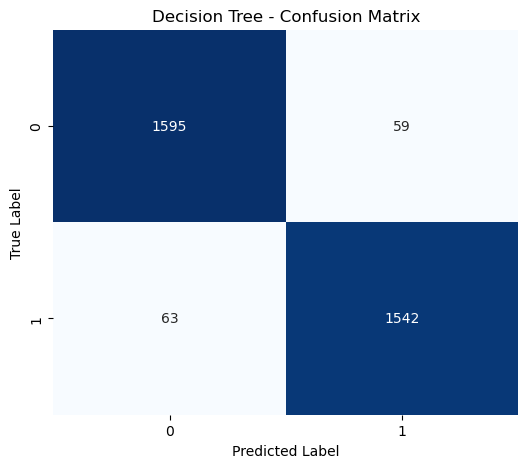

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [72]:
df.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,EU_ratio,JP_ratio,OTHER_ratio,Is_Hit,Is_Nintendo,Is_Sony_Entertainment,Is_Sony,Is_Electronic_Arts,Is_Namco,Is_Konami
0,1,wii sports,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
1,2,super mario bros.,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
2,3,mario kart wii,2008,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
3,4,wii sports resort,2009,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
4,5,pokemon red/pokemon blue,1996,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False


## logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Classifier with Preprocessing Pipeline
#define pipeline
lr_model = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000))
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9610309911015649


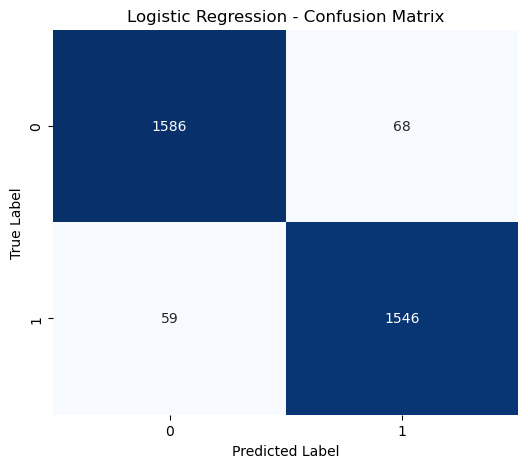

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier with Preprocessing Pipeline
#define pipeline
knn_model = Pipeline([
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])
#train, test
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
#evaluate model
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.9177661859466094


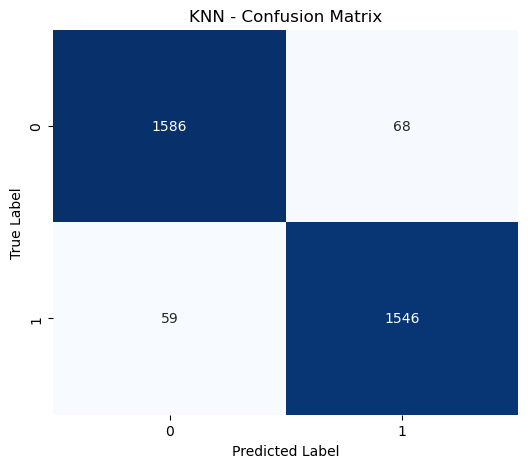

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN - Confusion Matrix")
plt.show()


## Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
#randomforest classifier with preprocessing pipeline
#define pipeline
rf_model = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(random_state=42))
])
#train, test
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
#evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9631788892298251


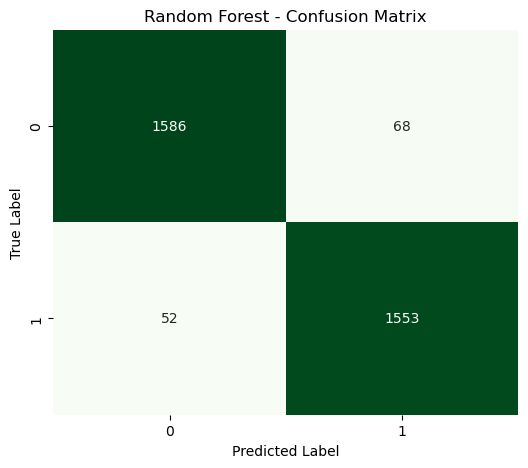

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [76]:
df.head(10)

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_lower,...,EU_ratio,JP_ratio,OTHER_ratio,Is_Hit,Is_Nintendo,Is_Sony_Entertainment,Is_Sony,Is_Electronic_Arts,Is_Namco,Is_Konami
0,1,wii sports,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
1,2,super mario bros.,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
2,3,mario kart wii,2008,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
3,4,wii sports resort,2009,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
4,5,pokemon red/pokemon blue,1996,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
5,6,tetris,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
6,7,new super mario bros.,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
7,8,wii play,2006,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
8,9,new super mario bros. wii,2009,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False
9,10,duck hunt,1992,nintendo,0.6,0.275,0.1,0.1,1.11,nintendo,...,0.247748,0.09009,0.09009,1,True,False,False,False,False,False


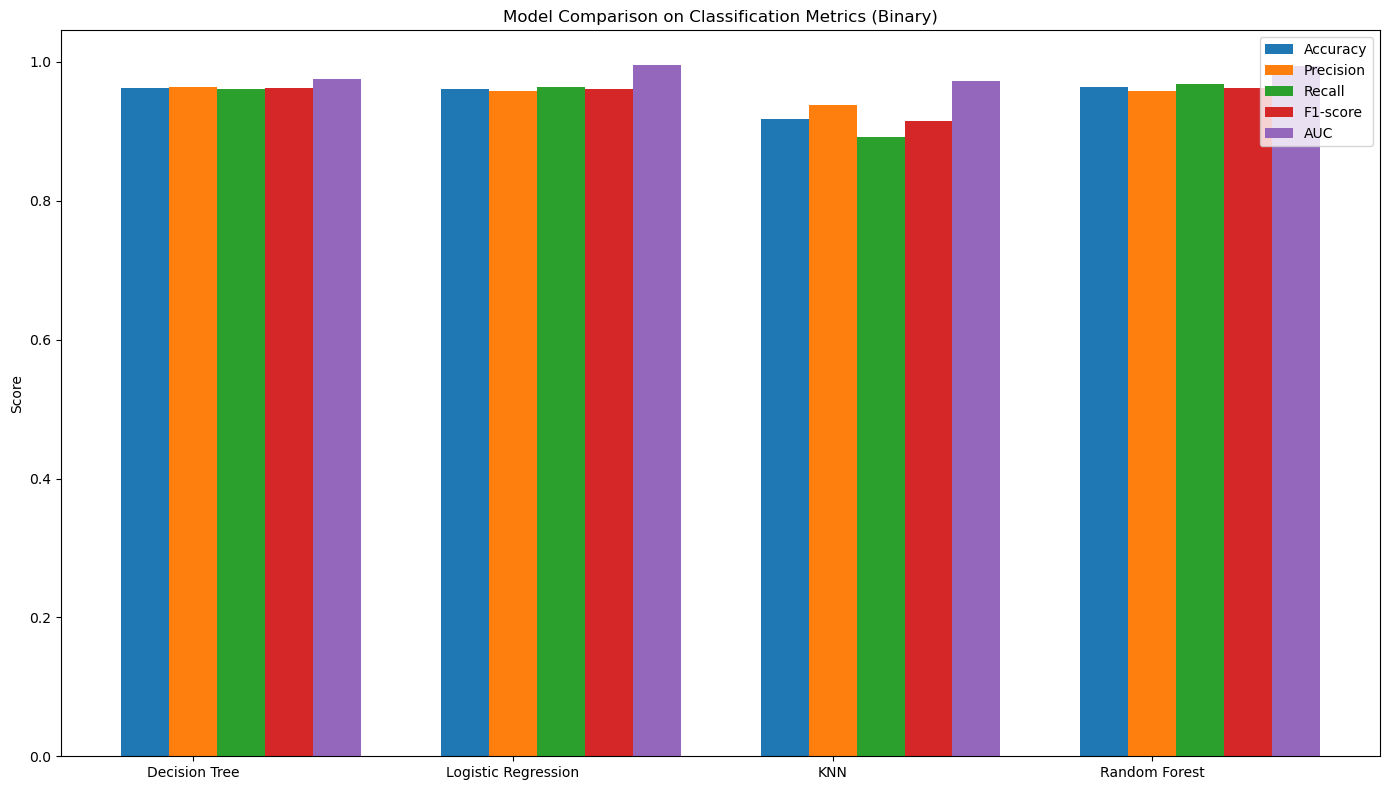

In [77]:
#model comparison of metrics ()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def compute_auc(model, X_test, y_test):
    proba = model.predict_proba(X_test)
    # binary classification → use only class 1 column
    if proba.shape[1] == 2:
        return roc_auc_score(y_test, proba[:, 1])
    else:
        return np.nan  # for models without proper probabilities
# All metrics defined here
# Their accuracy, precision, recall, f1-score, auc
metrics = {
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, dt_pred),
        "Precision": precision_score(y_test, dt_pred, average="binary"),
        "Recall": recall_score(y_test, dt_pred, average="binary"),
        "F1-score": f1_score(y_test, dt_pred, average="binary"),
        "AUC": compute_auc(dt_pipeline, X_test, y_test)
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, lr_pred),
        "Precision": precision_score(y_test, lr_pred, average="binary"),
        "Recall": recall_score(y_test, lr_pred, average="binary"),
        "F1-score": f1_score(y_test, lr_pred, average="binary"),
        "AUC": compute_auc(lr_model, X_test, y_test)
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, knn_pred),
        "Precision": precision_score(y_test, knn_pred, average="binary"),
        "Recall": recall_score(y_test, knn_pred, average="binary"),
        "F1-score": f1_score(y_test, knn_pred, average="binary"),
        "AUC": compute_auc(knn_model, X_test, y_test)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred, average="binary"),
        "Recall": recall_score(y_test, rf_pred, average="binary"),
        "F1-score": f1_score(y_test, rf_pred, average="binary"),
        "AUC": compute_auc(rf_model, X_test, y_test)
    }
}

# Preparing Data
models = list(metrics.keys())
metric_names = list(metrics["Decision Tree"].keys())
values = np.array([[metrics[m][metric] for metric in metric_names] for m in models])

# Plotting bar graph
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metric_names):
    plt.bar(x + i * width, values[:, i], width, label=metric)

plt.xticks(x + width, models)
plt.ylabel("Score")
plt.title("Model Comparison on Classification Metrics (Binary)")
plt.legend()
plt.tight_layout()
plt.show()



Feature Importance:

     Feature  Importance
3       Year    0.328361
2  Publisher    0.319741
1      Genre    0.220861
0   Platform    0.131037


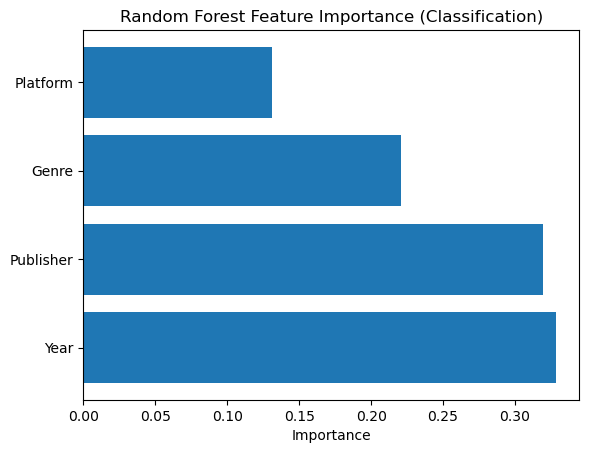

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load Dataset
df = pd.read_csv("vgsales.csv")   # keep CSV in same folder

# 2. Create Classes (Target)
df["Sales_Class"] = pd.cut(
    df["Global_Sales"],
    bins=[-1, 1, 10, df["Global_Sales"].max()],
    labels=["Low", "Medium", "High"]
)

# Drop missing values
df = df.dropna(subset=["Sales_Class", "Platform", "Genre", "Publisher", "Year"])

# 3. Features & Target
X = df[["Platform", "Genre", "Publisher", "Year"]].copy()
y = df["Sales_Class"]

# 4. Encode Categorical Data
for col in ["Platform", "Genre", "Publisher"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 5. Train Random Forest CLASSIFIER
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X, y)

# 6. Feature Importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n")
print(importance)

# 7. Plot Feature Importance
plt.figure()
plt.barh(importance["Feature"], importance["Importance"])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance (Classification)")
plt.show()
